In [2]:
#importing modules
import numpy as np
import pandas as pd
from itertools import combinations 
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#importing dataset
df = pd.read_csv('Market_Basket_Optimisation.csv')
df = df.iloc[:500,:]
minsup = 0.05
minconf = 0.5
N=len(df.values)
minsupcount = int(minsup * N)
print(minsupcount)


25


In [14]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,...,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,2,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,green tea,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,497,mineral water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,498,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,499,frozen vegetables,spaghetti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
def DataToMatrix(df):
    mat = {
            'id':[i for i in range(1,len(df)+1)]
    }
    l = set()
    for x in df.values:
        l=l.union(set(x[1:]))
    items = list(l)
    print(items)
    for x in items:
        if str(x)=='nan':
            continue
        mat.update({x:[0 for i in range(1,len(df)+1)]})
    for i,x in enumerate(df.values):
        for y in x:
            if y in mat.keys():
                mat[y][i]=1

    df = pd.DataFrame(mat)
    df.to_csv('Market_Basket_Optimisation_Matrix.csv',index=False) 
    return df    
df = DataToMatrix(df)


[nan, 'avocado', 'mushroom cream sauce', 'flax seed', 'muffins', 'protein bar', 'yogurt cake', 'salt', 'energy bar', 'chicken', 'frozen vegetables', 'champagne', 'nonfat milk', 'bug spray', 'extra dark chocolate', 'soup', 'salmon', 'pickles', 'whole weat flour', 'fresh tuna', 'cooking oil', 'pet food', 'honey', 'candy bars', 'babies food', 'soda', 'grated cheese', 'green grapes', 'carrots', 'hand protein bar', 'herb & pepper', 'melons', 'toothpaste', 'whole wheat rice', 'whole wheat pasta', 'strawberries', 'body spray', 'shallot', 'cereals', 'barbecue sauce', 'almonds', 'cookies', 'eggs', 'ground beef', 'eggplant', 'meatballs', 'fromage blanc', 'strong cheese', 'spinach', 'chili', 'spaghetti', 'burgers', 'dessert wine', 'corn', 'low fat yogurt', 'zucchini', 'olive oil', 'mint', 'salad', 'green tea', 'tomato juice', 'french wine', 'sandwich', 'vegetables mix', 'gums', 'green beans', 'tomato sauce', 'chutney', 'magazines', 'clothes accessories', 'butter', 'pancakes', 'french fries', 'hot

In [16]:
df

,id,avocado,mushroom cream sauce,flax seed,muffins,protein bar,yogurt cake,salt,energy bar,chicken,...,cauliflower,pasta,frozen smoothie,energy drink,blueberries,light mayo,black tea,brownies,ketchup,escalope
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,497,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,498,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,499,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.iloc[:,1:].values

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
minsupcount = 10

In [18]:
#Methods related to apriori 
def getSingleItemSets(a):
    res =[col for col in a.columns]
    #print(res)
    return res

def getSupCount(data,a):
    print(len(a))
    supcount=[0 for i in range(len(a))]
    cols= [col for col in data.columns]
    for i,x in enumerate(a):
        for y in data.values:
            flag = 0
            if type(x)==list:
                for k in x:
                    index = cols.index(k)
                    #print(y[index])
                    if y[index]==1:
                        flag+=1
                if flag >=len(x):
                    supcount[i]+=1
            
            else:
                supcount[i]=sum(data[x])
    print(supcount)
    return supcount

def pruning(itemset,minsupcount =3):
    #print(itemset)
    a=[]
    for x in itemset:
        if x[1]>=minsupcount:
            a.append(x)
    
    itemset = a[:]
    return pd.DataFrame(itemset)

def getItemSet(data,l):
    #print(data.values)
    t = set()
    for x in data.values:
        #print(x,'++>',type(x[0]))
        t=t.union(set(x[0])) if  type(x[0])==type(list()) else t.union(set(x))
    
    filt = list(t)
    #filt= np.unique(data.values)
    #print(type(filt))
    #for i in range(len(data)):
        #for x in data[i]:
            #print(x)
            #if x not in filt:
            #    filt.append(x)
    #print(data.values)
    #for x in data.values:
            #for y in x:
                #if y not in filt:
                    #print('asas',l,y)
                    #filt.append(y)
                    
    #print('x',l,filt)
    #s = [col for col in data.values]
    data =filt[:]
    #print(l,data,'dsfdsfdsfsdfsdfsd')
    comb = combinations(data,l)
    res =[]
    for x in np.array(list(comb)):
        #print(x,"\n\n")
        res.append([y for y in x])
    return (res)#np.array(list(comb))
def generateItemset(df,data,minsupcount,l=1):
    if l==1:
        a = getSingleItemSets(data)
    else:
        a = getItemSet(data,l)
    #print(a)
    supcount = getSupCount(df,a)
    itemset= []
    for i in range(len(a)):
        itemset.append([a[i],supcount[i]])
    itemset =pruning(itemset,minsupcount)
    return itemset
l1 = generateItemset(df.iloc[:,1:],df.iloc[:,1:],minsupcount,1)
l2 = generateItemset(df.iloc[:,1:],l1.iloc[:,:1],minsupcount,2)



114
[17, 8, 1, 10, 14, 6, 6, 17, 25, 43, 24, 2, 4, 4, 38, 23, 2, 1, 12, 24, 5, 20, 6, 2, 3, 20, 7, 7, 1, 31, 3, 2, 21, 16, 9, 7, 7, 5, 5, 10, 39, 103, 49, 5, 13, 3, 4, 6, 3, 96, 39, 2, 6, 32, 1, 30, 4, 4, 59, 25, 12, 2, 7, 5, 1, 11, 2, 7, 3, 7, 30, 79, 19, 56, 13, 3, 14, 6, 2, 3, 4, 4, 2, 6, 14, 3, 39, 2, 89, 22, 19, 23, 12, 8, 121, 4, 3, 8, 34, 37, 3, 2, 2, 10, 2, 23, 27, 15, 4, 15, 5, 10, 1, 33]
253
[6, 4, 14, 9, 5, 4, 3, 4, 12, 2, 11, 3, 5, 3, 13, 8, 5, 4, 2, 5, 3, 5, 3, 9, 3, 4, 2, 4, 4, 2, 2, 9, 4, 2, 3, 5, 3, 3, 4, 1, 2, 3, 3, 9, 2, 5, 3, 2, 2, 9, 0, 6, 3, 0, 3, 9, 1, 7, 2, 2, 2, 0, 4, 19, 17, 11, 9, 8, 15, 1, 30, 22, 20, 11, 32, 12, 13, 9, 8, 13, 15, 27, 6, 2, 5, 5, 5, 0, 12, 10, 10, 3, 16, 4, 7, 1, 3, 3, 6, 12, 4, 6, 3, 4, 2, 13, 7, 11, 1, 9, 4, 5, 2, 3, 3, 7, 9, 4, 2, 5, 1, 12, 3, 4, 4, 5, 3, 3, 2, 1, 3, 3, 8, 3, 5, 2, 17, 10, 6, 1, 6, 9, 1, 1, 1, 3, 3, 6, 10, 0, 12, 5, 5, 1, 9, 4, 2, 3, 1, 3, 4, 4, 4, 20, 3, 12, 4, 18, 10, 6, 8, 6, 1, 4, 16, 7, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 3

In [20]:
l2

,0,1
0,"[mineral water, eggs]",30
1,"[mineral water, spaghetti]",32
2,"[mineral water, chocolate]",27


In [44]:
l3 = generateItemset(df.iloc[:,1:],l2.iloc[:,:1],minsupcount,3)


[2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 4, 2, 5, 0, 2, 1, 2, 5, 0, 2, 0, 0, 1, 4, 1, 0, 2, 0, 0, 2, 1, 4, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 6, 1, 3, 1, 3, 1, 2, 2, 0, 2, 1, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 0, 3, 0, 3, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 1, 0, 1, 1, 3, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 3, 0, 0, 3, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 3, 1, 1, 0, 1, 4, 5, 1, 3, 4, 0, 2, 3, 2, 5, 1, 1, 6, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 

In [45]:
l3

,0,1
0,"[eggs, spaghetti, mineral water]",13
1,"[chocolate, milk, mineral water]",10


In [48]:

def plotItemsetSupcount(data,w):
    colors = ['red']
    names = ["Itemset"]
    x = data.iloc[:,:1].values
    y = data.iloc[:,1:].values
    xticks = [i[0] for i in x]
    
    fig, ax = plt.subplots()
    x = np.arange(len(y))
    ax.bar(x, y[:,0], color=colors[0], width=w, label=names[0])
    ax.set(xticks=x, xticklabels=xticks)
    ax.legend()
    plt.xlabel('ItemSets')
    plt.ylabel("Support count")
    plt.show()


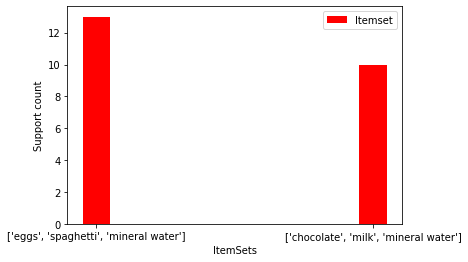

In [49]:
plotItemsetSupcount(l3,0.1)

In [325]:

#Finding Association Rules
def FindAssociationRules(itemset):
    global l1,l2
    rules = {
            'antecedent':[],'consequent':[]
            }
    #for i in range(itemset.values[0]):
    items=[x[0] for x in itemset.values]
    
    for x in items:
        for i in range(len(x)):
            rules['antecedent'].append(x[i])
            rules['consequent'].append(x[:i]+x[i+1:])
            rules['consequent'].append(x[i])
            rules['antecedent'].append(x[:i]+x[i+1:])

    rules = pd.DataFrame(rules)
    def getNumerator(data,x):

        for i in range(len(data)):
            x.sort()
            y = data[i][:1][0]
            y.sort()
            if x==y:
                return data[i][:][1]

        #set = [[data[i][:1][0]] + [data[i][:][1]] for i in range(len(data))]
    def getDenomenator(data,x,k) :
        for i in range(len(data)):
            if k==1:
                if x==data[i][:1][0]:
                    return data[i][1:][0]
            elif set(data[i][:1][0]).issubset(set(x)) and len(x)==len(data[i][:1][0]):
                #print(x,data[i][1:][0])
                return data[i][1:][0]#data[i][:][1]
    confidences = []
    #print(rules.values)
    for x in rules.values:
        if type(x[0]) == type(list()):
            s = x[0:1][0].copy()
            
            s.extend([x[1]])
        else:
            s = list(x[0:1]).copy()
            s.extend(x[1])
        
        n=getNumerator(itemset.values,s)
        d = getDenomenator(l2.values,x[0],2) if type(x[0]) == type(list()) else getDenomenator(l1.values,x[0:1],1)
        #print(n,d)
        if d==None:
            d=1
        #n=d=1
        confidences.append(n/d)
    rules['confidences'] =confidences


    #Support
    supports = []
    for x in rules.values:
        n=getNumerator(itemset.values,s)
        supports.append(n/N)
    rules['supports'] =supports
    return rules

In [326]:
rules = FindAssociationRules(l3)
strongrules = FindStrongRules(rules.copy(),minconf)

,antecedent,consequent,confidences,supports
3,"[eggs, spaghetti]",mineral water,0.565217,0.02
7,"[milk, mineral water]",chocolate,0.500000,0.02


In [304]:
l=['ss','aa']
d= ['aa','ss']
s = set(l)
set(l).issubset(set(d))

True

In [328]:
def FindStrongRules(rules,minconf):
    i =0
    while True:
        if i >= len(rules.values):
            break
        if rules.values[i][2] < minconf:
            rules.drop(rules.index[[i]],inplace=True)
            i-=1
        i+=1
    return rules

In [329]:
def Plot_Rules_Conf(rules):
    plt.style.use('ggplot')
    confidences = [ i/10 for i in range(2,8)]
    no_of_rules = [ len(FindStrongRules(rules.copy(),c)) for c in confidences] 
    plt.xlabel('Confidence Level')
    plt.yticks(range(len(rules)*2))
    plt.ylabel('No of Rules')
    plt.title('Apriori Algorithm at Different confidence')
    plt.plot(confidences,no_of_rules)
    plt.show()

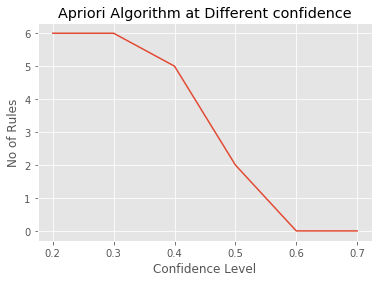

In [330]:
Plot_Rules_Conf(rules)

# zcdzcvdvdsv